In [1]:
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df_can = pd.read_excel(
    URL,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\asank\AppData\Local\Temp\ipykernel_19288\2754968886.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum (axis = 1)


In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


In [7]:
# Waffle charts

# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

In [8]:
# Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total']/total_values

# Print out proportions
pd.DataFrame({"Category Proportion": category_proportions })

Category Proportion
Country                     
Denmark             0.322557
Norway              0.192409
Sweden              0.485034

In [9]:
# Step 2. The second step is defining the overall size of the waffle chart.

width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total no of tiles

print(f'Total number of tiles is {total_num_tiles}.')
#print('Total number of tiles is: ', total_num_tiles)  # optional way

Total number of tiles is 400.


In [10]:
# Step 3. The third step is using the proportion of each category to determe it respective number of tiles

# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

#print out number of tiles per category
pd.DataFrame({"Number of tiles" :tiles_per_category}) # Put a Pandas dataframe



Number of tiles
Country                 
Denmark              129
Norway                77
Sweden               194

In [11]:
# Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((3, 3), dtype = np.uint)   # 3*3 matrix as an example
waffle_chart

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint32)

In [12]:
# Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)   # default height * width matrix to match any dimension
                                                            # numpy.uint is a data type - Unsigned long

    
# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):    # starting to fill the matrix from height direction. can start from the width as well...
        tile_index += 1          # alternative way....tile_index = tile_index + 1
        
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]): # ...proceed to the next category
            category_index += 1                                    # [0:0], [0:1], [0:2] vlaues accumilation....
            
        waffle_chart[row,col] = category_index
        
print('Waffle chart populated')
            

Waffle chart populated


In [13]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

C:\Users\asank\AppData\Local\Temp\ipykernel_19288\1150442822.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

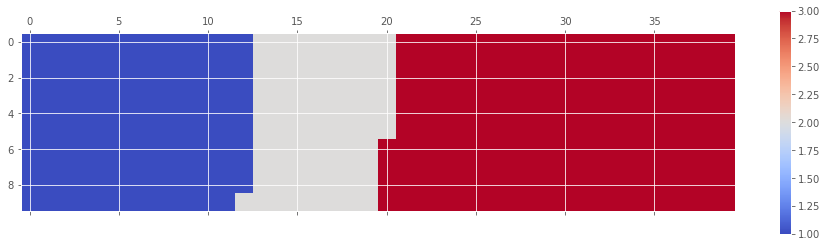

In [14]:
# Step 5. Map the waffle chart matrix into a visual.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

C:\Users\asank\AppData\Local\Temp\ipykernel_19288\3767779010.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()  # colorbar is to visualize scalar values to colors


<Figure size 432x288 with 0 Axes>

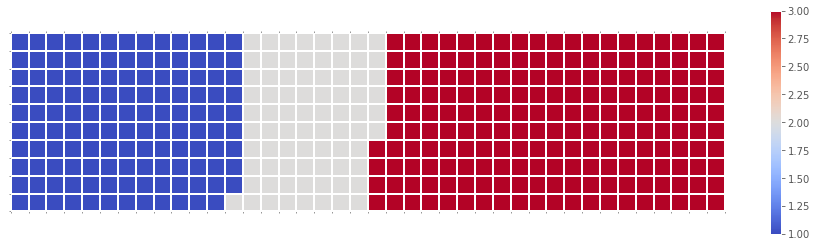

In [15]:
# Step 6. Prettify the chart.

# instantiate a new figure object
fig = plt.figure()

# Use matshow to display the waffle chart
colormap = plt.cm.coolwarm   # cm-colormap, coolwarm-name of the colormap (jet is another type)
plt.matshow(waffle_chart, cmap=colormap) # matshow function is to visualize a matrix
plt.colorbar()  # colorbar is to visualize scalar values to colors

# get the axis
ax = plt.gca() # gca-get current axis..if no previous axis, new axis will be created

# set minor ticks
ax.set_xticks(np.arange(-.5,(width), 1), minor=True)
ax.set_yticks(np.arange(-.5,(height), 1), minor=True)

# add gridlines based on minor tricks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()


C:\Users\asank\AppData\Local\Temp\ipykernel_19288\2209155356.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()  # colorbar is to visualize scalar values to colors


<Figure size 432x288 with 0 Axes>

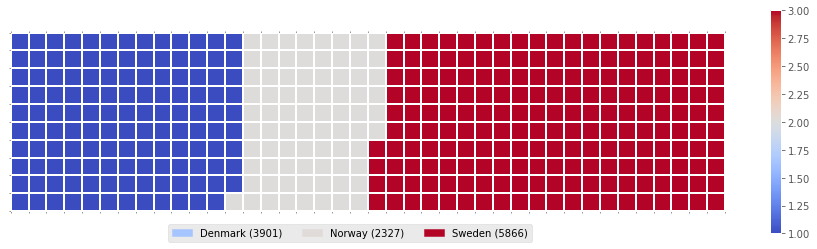

In [27]:
# Step 7. Create a legend and add it to chart.

# instantiate a new figure object
fig = plt.figure()

# Use matshow to display the waffle chart
colormap = plt.cm.coolwarm   # cm-colormap, coolwarm-name of the colormap (jet is another type)
plt.matshow(waffle_chart, cmap=colormap) # matshow function is to visualize a matrix
plt.colorbar()  # colorbar is to visualize scalar values to colors

# get the axis
ax = plt.gca() # gca-get current axis..if no previous axis, new axis will be created

# set minor ticks
ax.set_xticks(np.arange(-.5,(width), 1), minor=True)
ax.set_yticks(np.arange(-.5,(height), 1), minor=True)

# add gridlines based on minor tricks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values): # 'enumerate' to loop through the df_dsn index and values (so i=index, category=country)
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

In [22]:
# create waffle chart function rather than repeating these 7 steps.

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]  # Using value instead of values using for. 
                                                                                # Try to avoid plural forms with Python
    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions] # Replacing category_proportions

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [23]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\asank\AppData\Local\Temp\ipykernel_19288\624416666.py:47: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

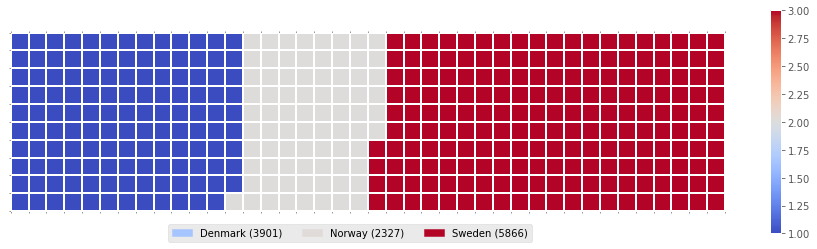

In [28]:
create_waffle_chart(categories, values, height, width, colormap)

There seems to be a new Python package for generating waffle charts called PyWaffle, but it looks like the repository is still being built. But feel free to check it out and play with it.

In [22]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Using pywaffle...keep practicing with new libraray

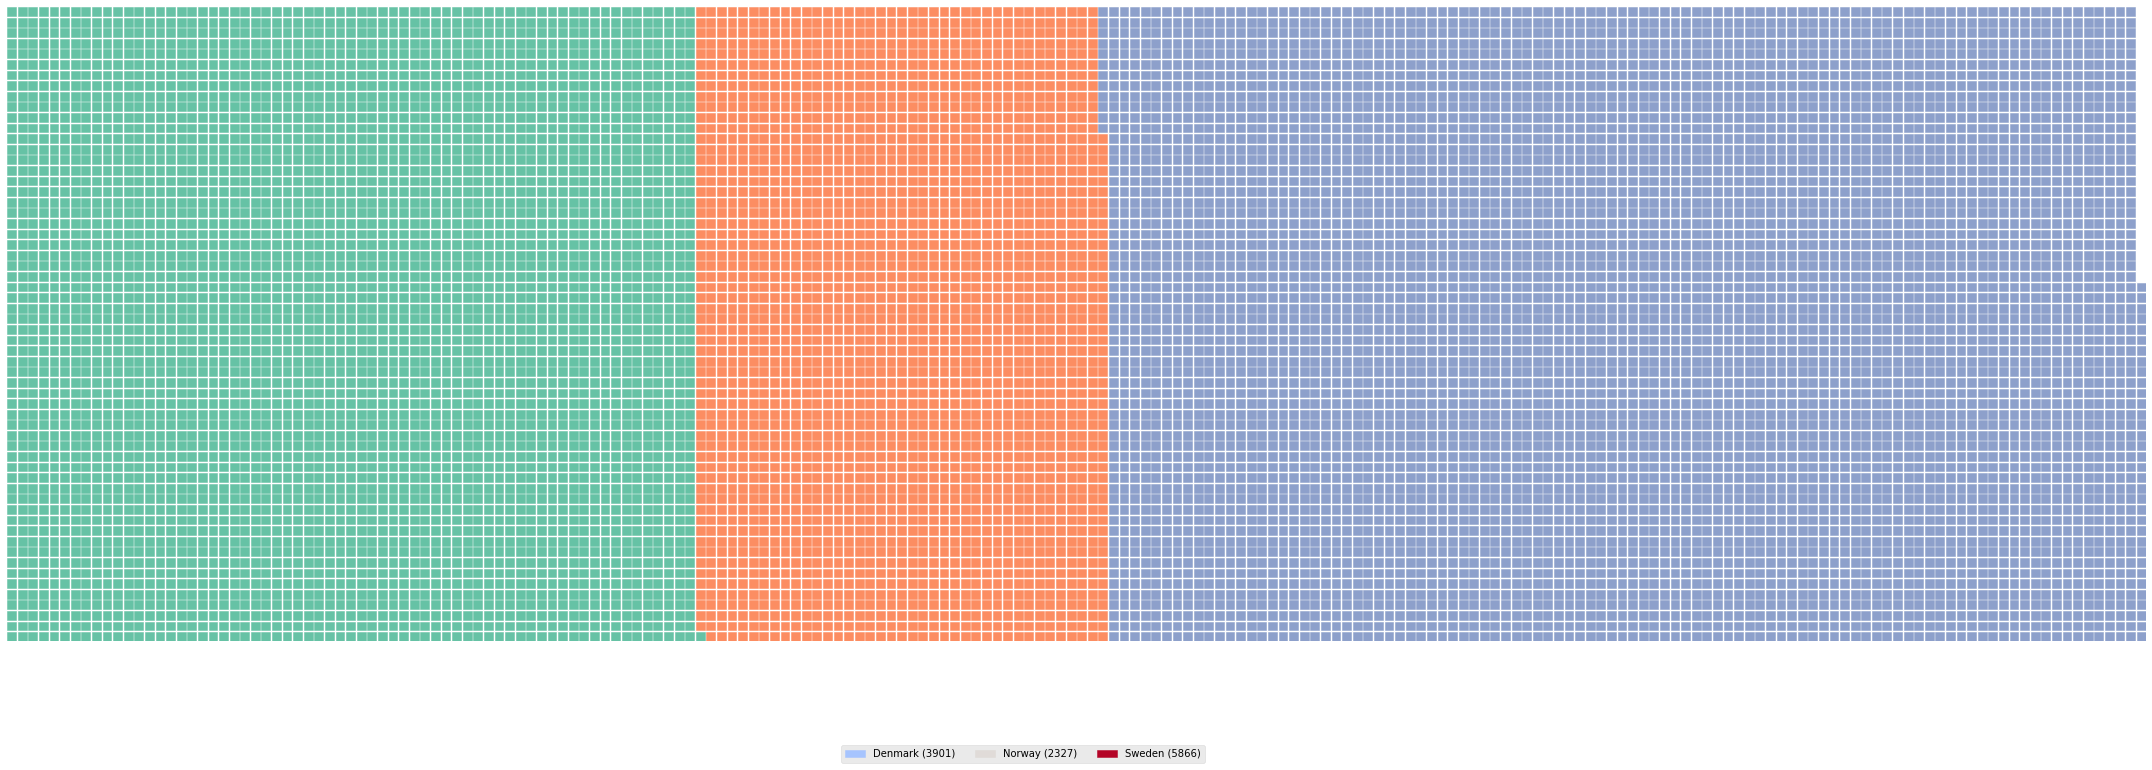

In [23]:
from pywaffle import Waffle

plt.rcParams["figure.figsize"] = [30, 20]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(
FigureClass=Waffle,
rows=60,
values = df_dsn['Total'],    
)

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(5, (width), 100), minor=True)
ax.set_yticks(np.arange(5, (height), 100), minor=True)

# add gridlines based on minor tricks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
colormap = plt.cm.coolwarm
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values): # 'enumerate' to loop through the df_dsn index and values (so i=index, category=country)
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
    

plt.show()

..........Using Wordcloud........

In [24]:
!pip install wordcloud

In [40]:
pip install wordcloud

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\asank\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\asank\\AppData\\Local\\Temp\\pip-install-x2ms9x8j\\wordcloud_260b42c26e7d48859302709b8c16131c\\setup.py'"'"'; __file__='"'"'C:\\Users\\asank\\AppData\\Local\\Temp\\pip-install-x2ms9x8j\\wordcloud_260b42c26e7d48859302709b8c16131c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\asank\AppData\Local\Temp\pip-wheel-r8w6o2bp'
       cwd: C:\Users\asank\AppData\Local\Temp\pip-install-x2ms9x8j\wordcloud_260b42c26e7d48859302709b8c16131c\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

In [2]:
conda upgrade notebook

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud, STOPWORDS
import urllib

In [30]:
# # open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [31]:
#Next, let's use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

In [32]:
# # instantiate a word cloud object (Create a wordcloud object)
alice_wc = WordCloud(
     background_color='white',
     max_words=2000,
     stopwords=stopwords,
)

# # generate the word cloud
alice_wc.generate(alice_novel)

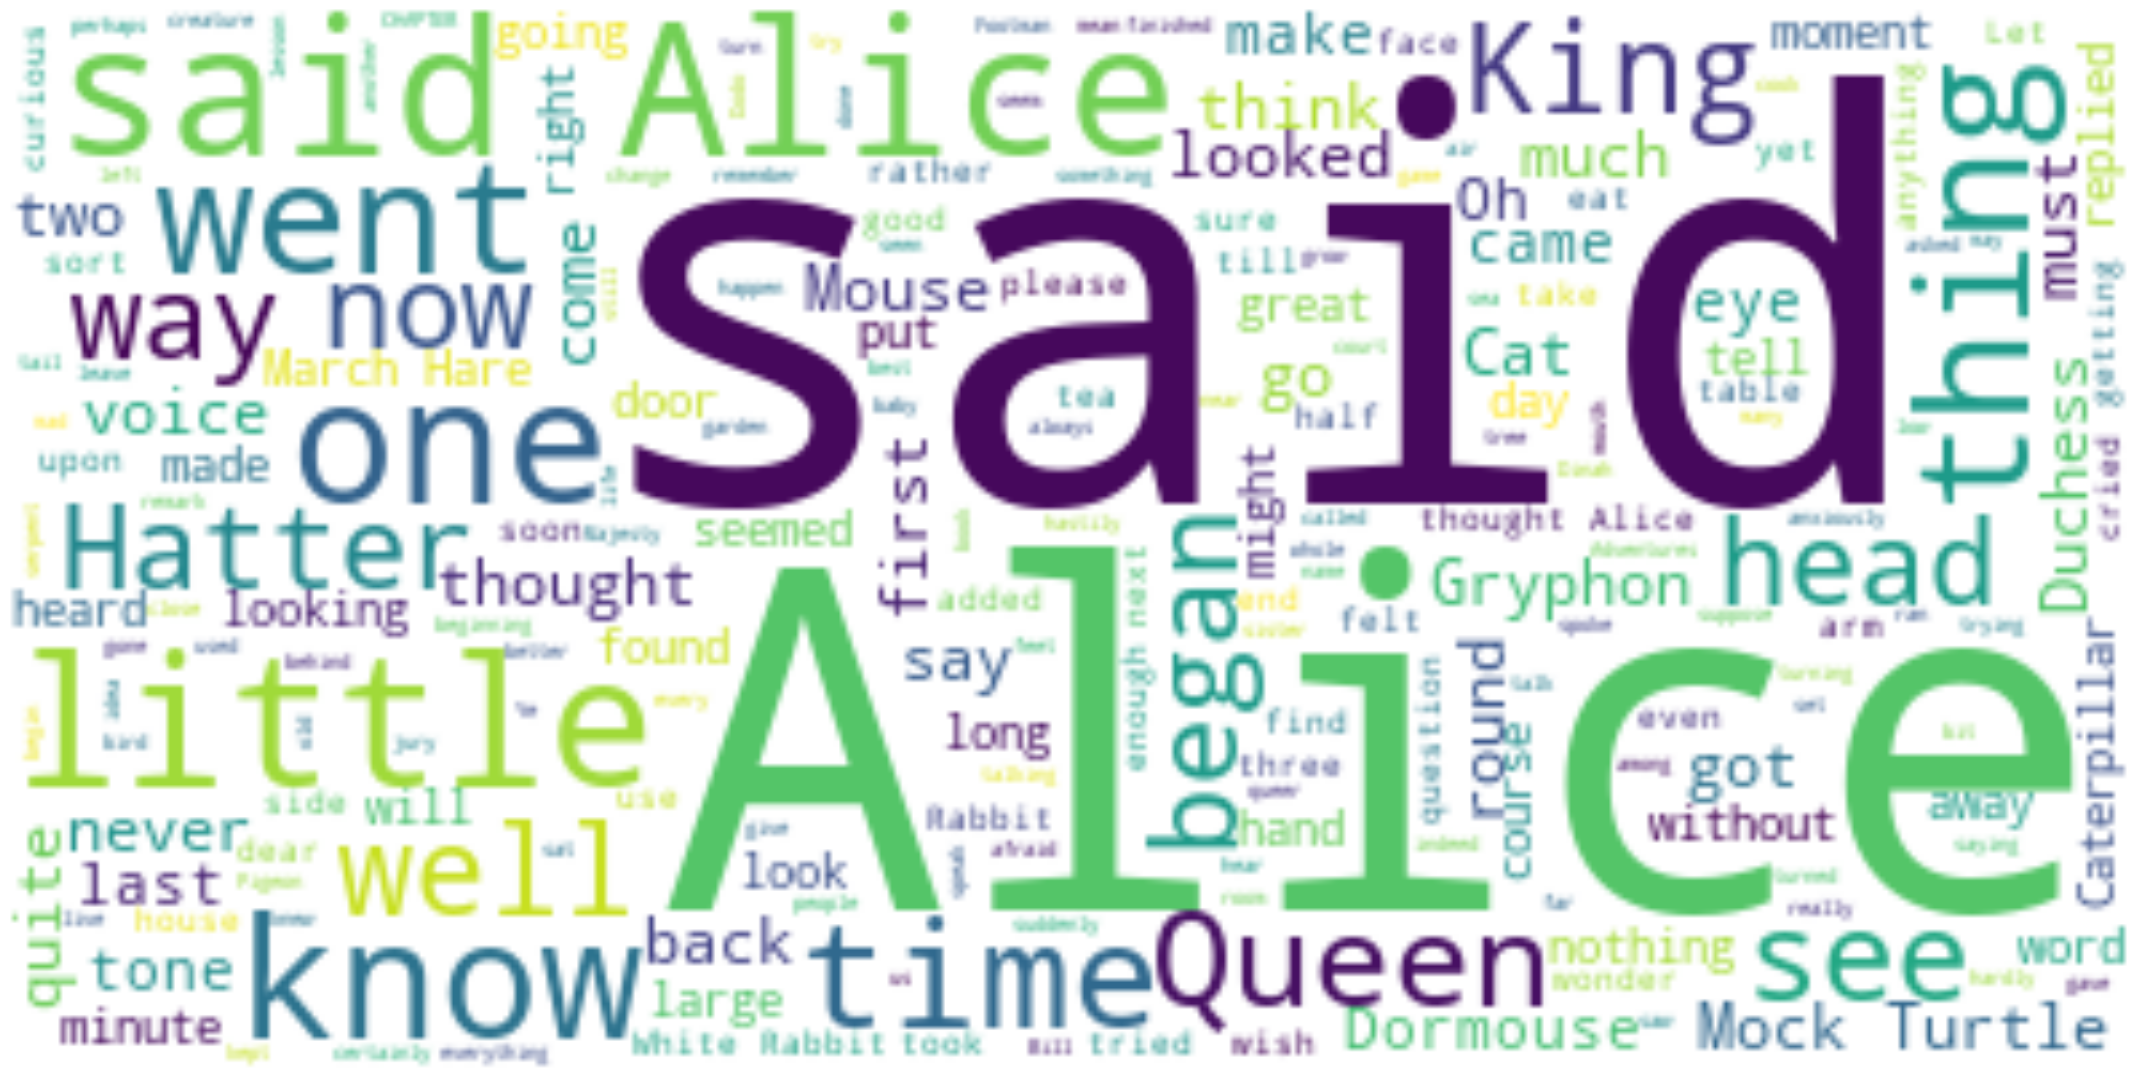

In [30]:
# # display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are Alice, said, little, Queen, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

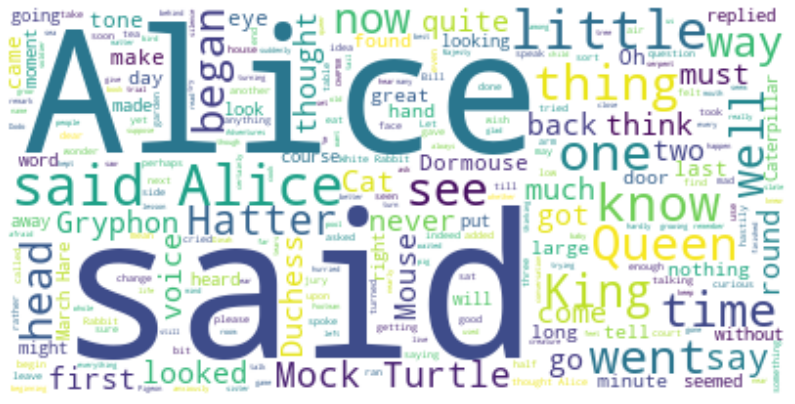

In [33]:
fig = plt.figure(figsize=(14, 18))

# # display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

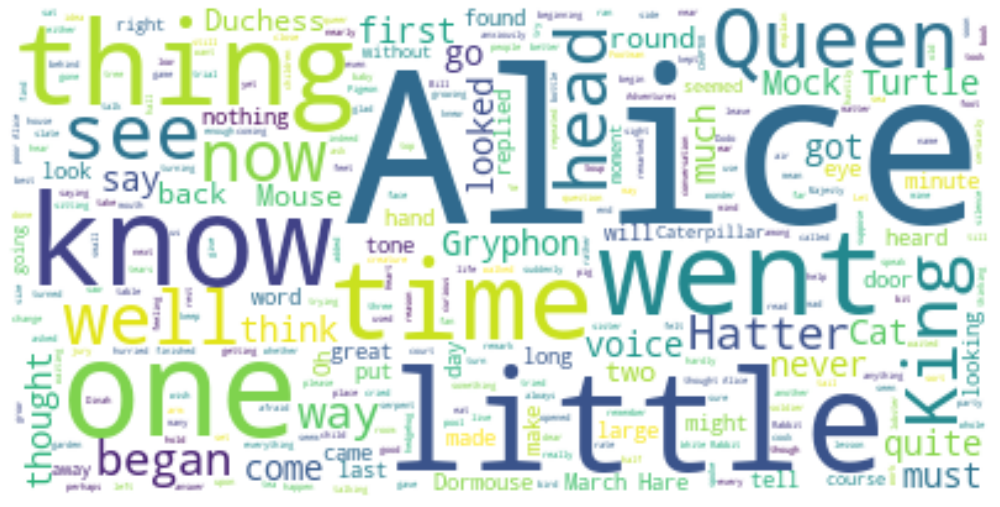

In [32]:
stopwords.add('said') # add the words said to stopwords

# # re-generate the word cloud
alice_wc.generate(alice_novel)

# # display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Excellent! This looks really interesting! Another cool thing you can implement with the word_cloud package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it alice_mask.png.

In [34]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

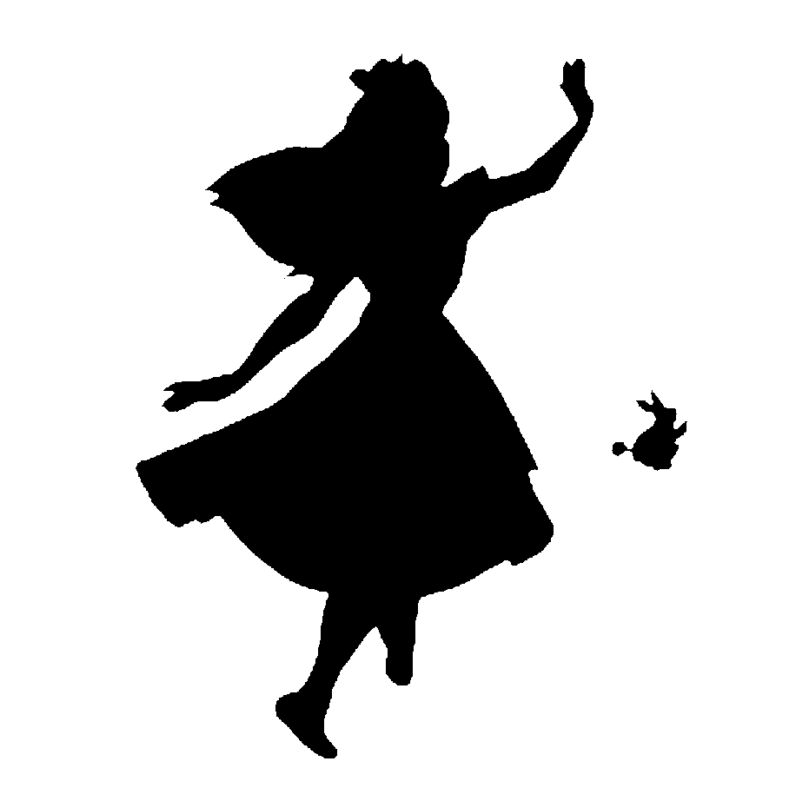

In [35]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

# Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

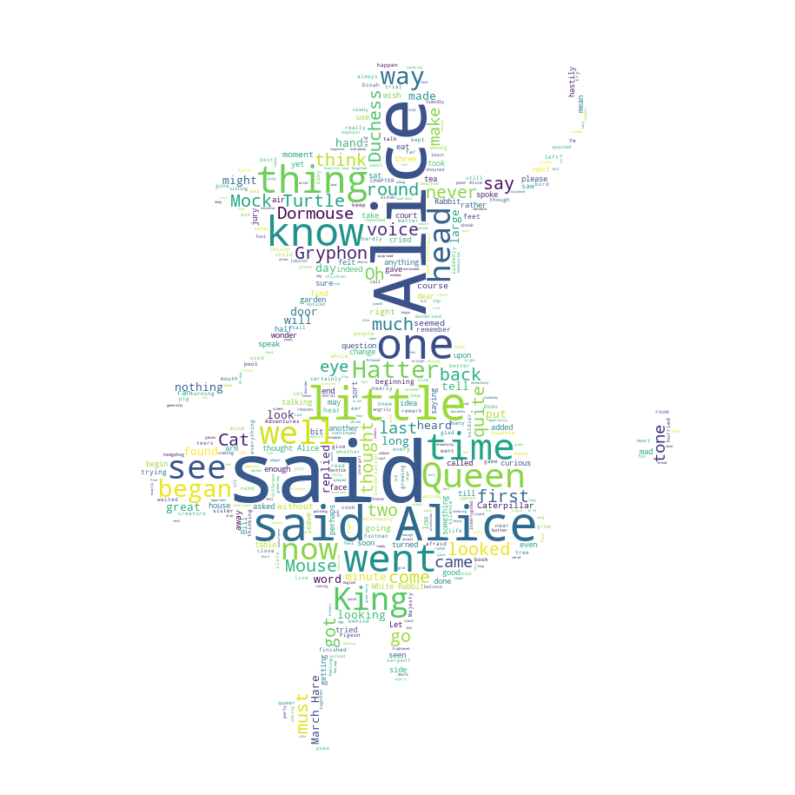

In [36]:
# # instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# # generate the word cloud
alice_wc.generate(alice_novel)

# # display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

   # Using wordcloud in immigration dataset

In [37]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [38]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [39]:
max_words = 90
word_string = ''
for country in df_can.index.values:
#     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# # display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.

In [40]:
# # create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


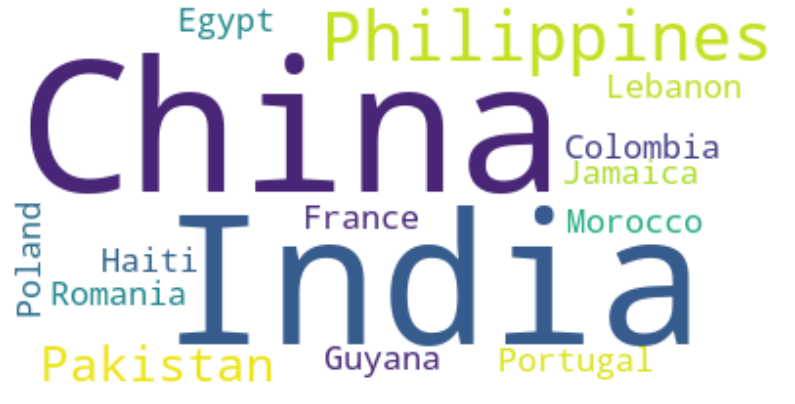

In [41]:
# # display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

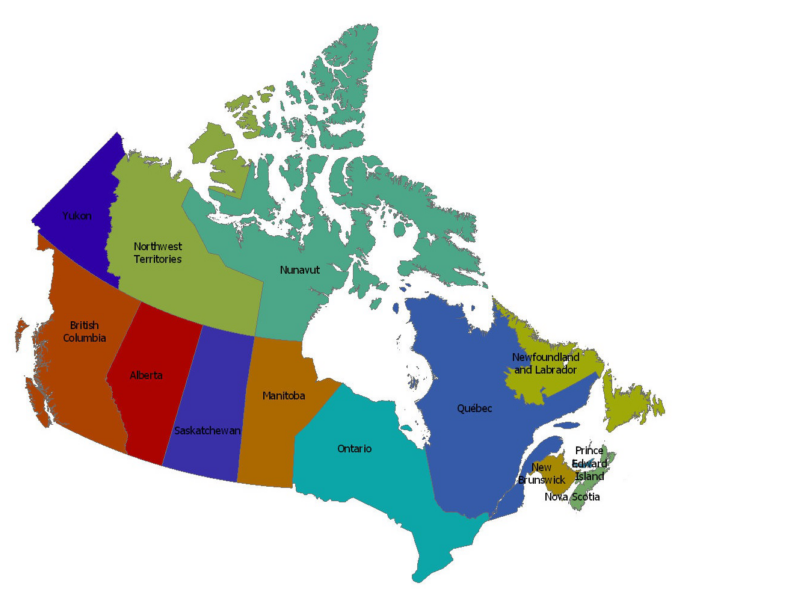

In [42]:
# save mask to canada_mask
path = "C:/Asanka/canada_map.jpg"
canada_mask = np.array(Image.open(path))

fig = plt.figure(figsize=(14, 18))

plt.imshow(canada_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

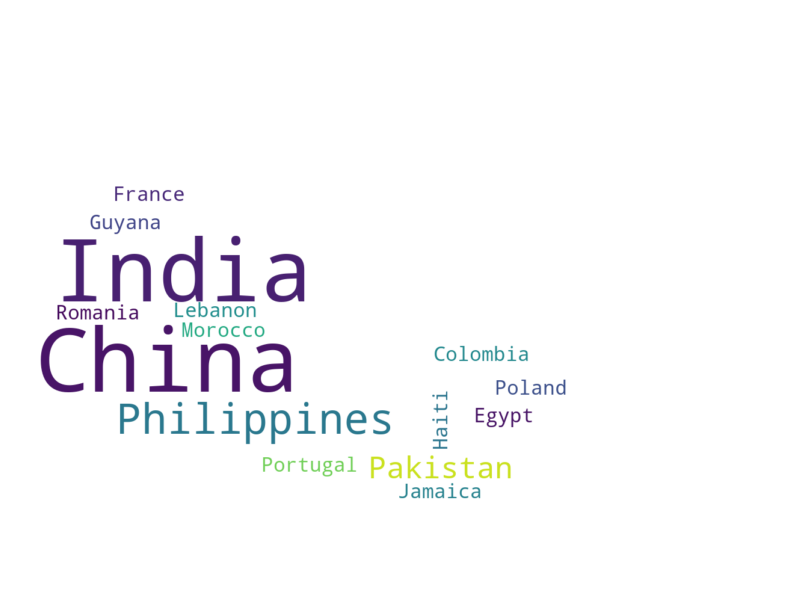

In [43]:
# # instantiate a word cloud object
canada_wc = WordCloud(background_color='white', max_words=90, mask=canada_mask)

# # generate the word cloud
canada_wc.generate(word_string)

# # display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(canada_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about seaborn by following this link and more about seaborn regression plots by following this link.

In lab Pie Charts, Box Plots, Scatter Plots, and Bubble Plots, we learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore seaborn and see how efficient it is to create regression lines and fits using this library!

Let's first install seaborn

In [45]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [47]:
# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [48]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [49]:
# add total column
df_can['Rows Total'] =  df_can.sum (axis = 0)

In [50]:
df_can.tail()

Continent              Region             DevName  1980  1981  \
Country                                                                        
Viet Nam            Asia  South-Eastern Asia  Developing regions  1191  1829   
Western Sahara    Africa     Northern Africa  Developing regions     0     0   
Yemen               Asia        Western Asia  Developing regions     1     2   
Zambia            Africa      Eastern Africa  Developing regions    11    17   
Zimbabwe          Africa      Eastern Africa  Developing regions    72   114   

                1982  1983  1984  1985  1986  ...  2006  2007  2008  2009  \
Country                                       ...                           
Viet Nam        2162  3404  7583  5907  2741  ...  3153  2574  1784  2171   
Western Sahara     0     0     0     0     0  ...     1     0     0     0   
Yemen              1     6     0    18     7  ...   140   122   133   128   
Zambia            11     7    16     9    15  ...    77    71    64    60   
Zimbabwe         102    44    32    29    43  ...   454   663   611   508   

                2010  2011  2012  2013  Total  Rows Total  
Country                                                    
Viet Nam        1942  1723  1731  2112  97146         NaN  
Western Sahara     0     0     0     0      2         NaN  
Yemen            211   160   174   217   2985         NaN  
Zambia           102    69    46    59   1677         NaN  
Zimbabwe         494   434   437   407   8598         NaN  

[5 rows x 39 columns]

In [51]:
df_can.drop(['Rows Total'], axis = 1, inplace = True)

In [52]:
df_can.tail()

Continent              Region             DevName  1980  1981  \
Country                                                                        
Viet Nam            Asia  South-Eastern Asia  Developing regions  1191  1829   
Western Sahara    Africa     Northern Africa  Developing regions     0     0   
Yemen               Asia        Western Asia  Developing regions     1     2   
Zambia            Africa      Eastern Africa  Developing regions    11    17   
Zimbabwe          Africa      Eastern Africa  Developing regions    72   114   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Viet Nam        2162  3404  7583  5907  2741  ...  1852  3153  2574  1784   
Western Sahara     0     0     0     0     0  ...     0     1     0     0   
Yemen              1     6     0    18     7  ...   161   140   122   133   
Zambia            11     7    16     9    15  ...    91    77    71    64   
Zimbabwe         102    44    32    29    43  ...   615   454   663   611   

                2009  2010  2011  2012  2013  Total  
Country                                              
Viet Nam        2171  1942  1723  1731  2112  97146  
Western Sahara     0     0     0     0     0      2  
Yemen            128   211   160   174   217   2985  
Zambia            60   102    69    46    59   1677  
Zimbabwe         508   494   434   437   407   8598  

[5 rows x 38 columns]

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

In [67]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index) #df_tot.index is currently the years.so we change it to float

# change the years to type float (useful for regression later on)
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

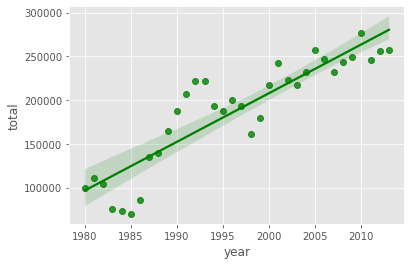

In [68]:
# With seaborn, generating a regression plot is as simple as calling the regplot function.
sns.regplot(x='year', y='total', data=df_tot, color = 'green')
plt.show()

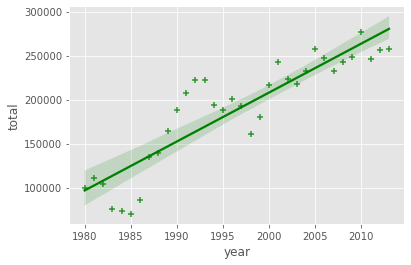

In [69]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+') # change markers to '+'
plt.show()

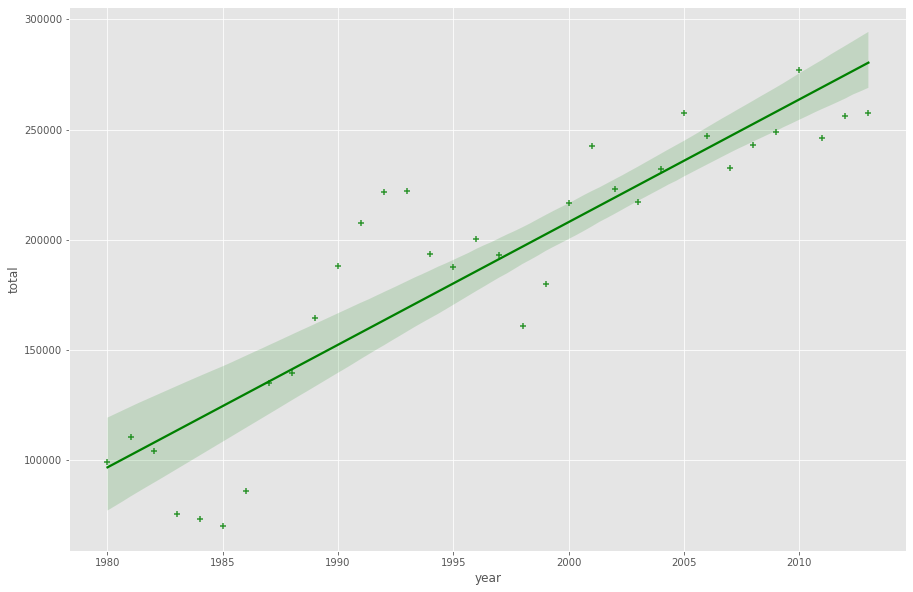

In [70]:
#Let's blow up the plot a little so that it is more appealing to the sight

plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

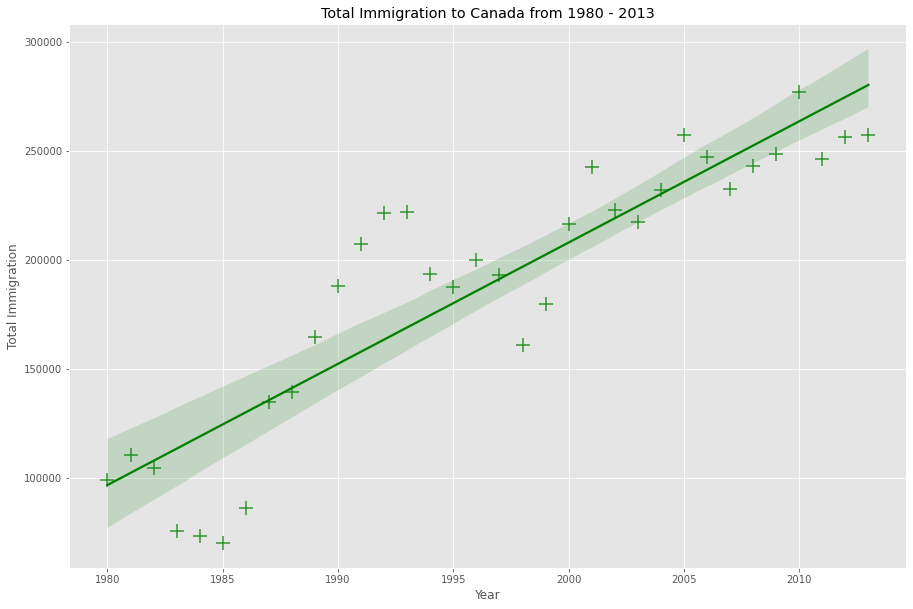

In [77]:
# And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.

plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green',marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y- labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

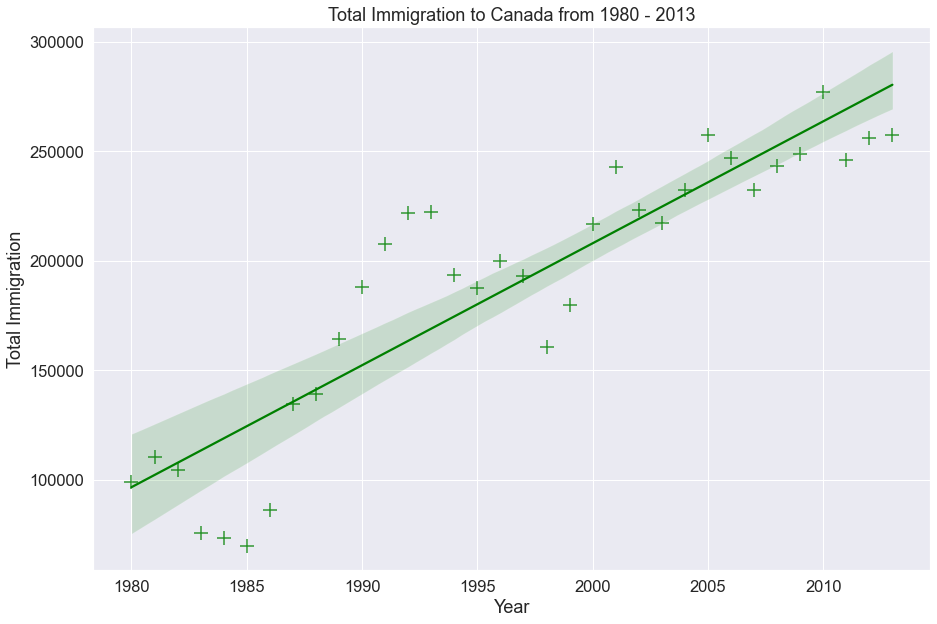

In [84]:
# And finally increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

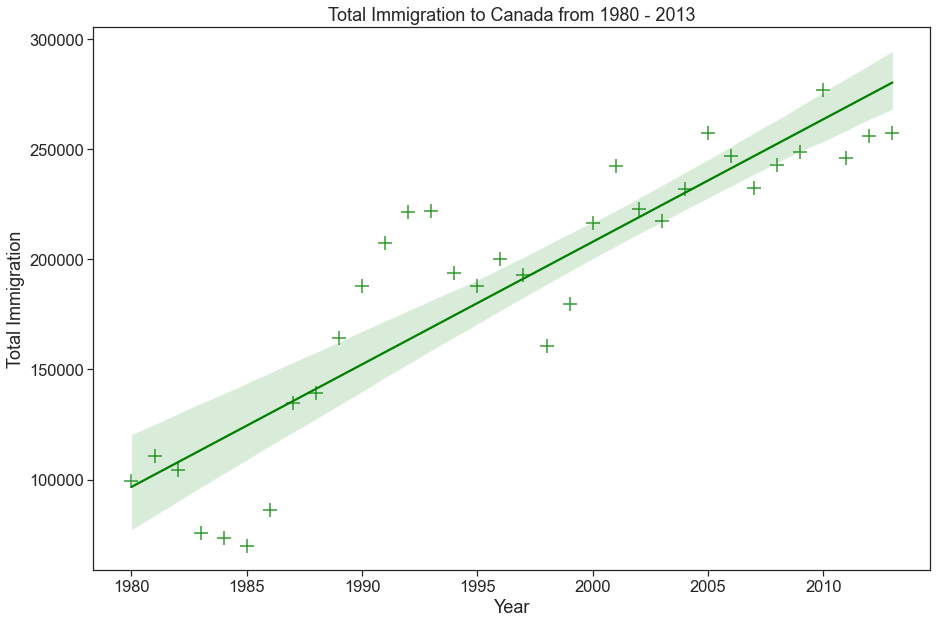

In [85]:
# With background color change to white

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

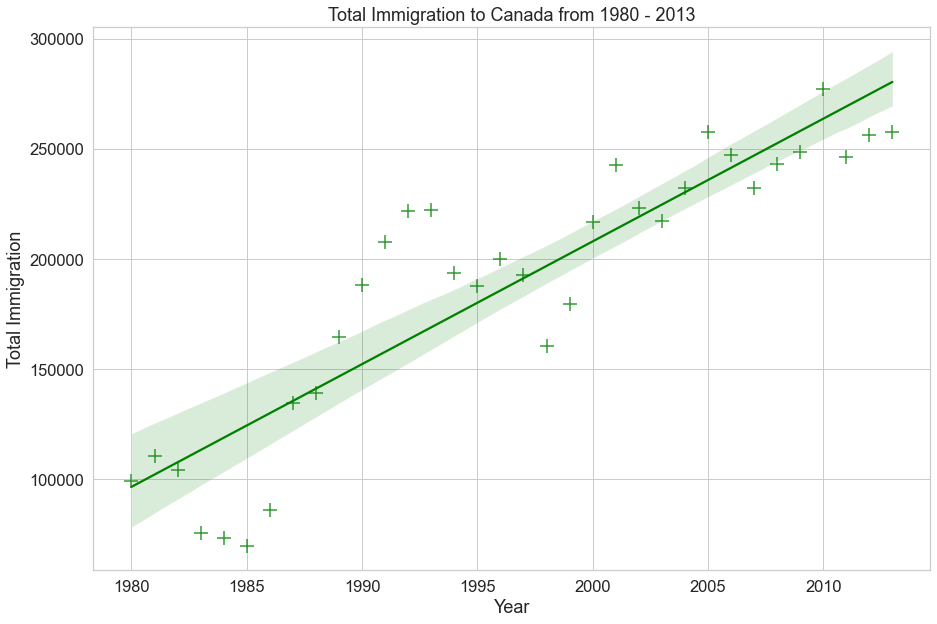

In [90]:
# white background with gridlines

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')  # change background to white with grid

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013

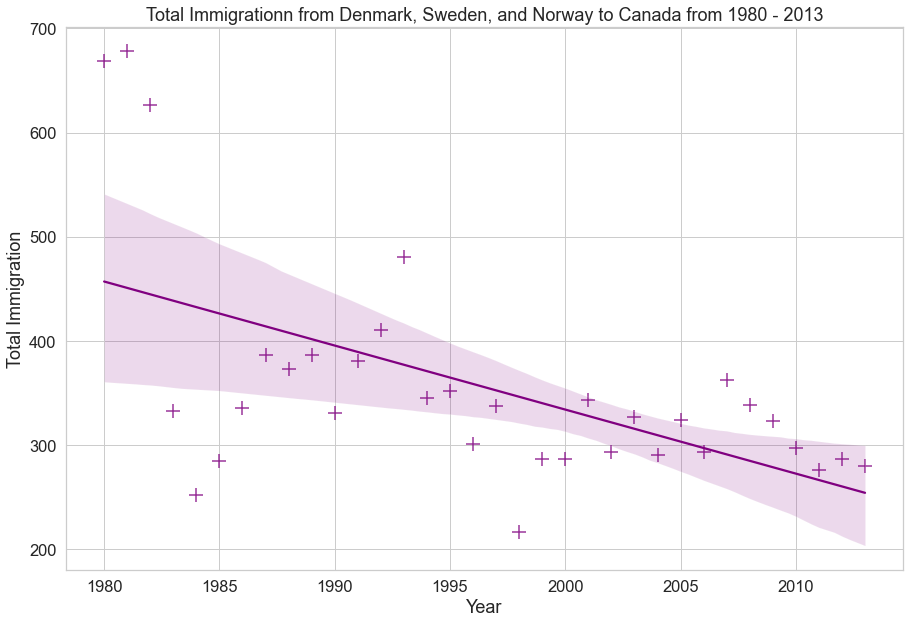

In [99]:
#The correct answer is:
    
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='purple', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')
plt.show()